In [83]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import style
style.use('ggplot')   #图画风格
plt.rcParams['font.sans-serif'] = ['SimHei']  #字体风格
plt.rcParams['axes.unicode_minus'] = False    #是否中文字体变小
plt.rcParams['figure.figsize'] = (12,7)       #图像大小

import os,sys
sys.path.append(os.path.abspath("../"))
from util import util

In [2]:
FILE_NAME = '../input/years/2015_year.csv'  
START_POINT = '2015/1/1 0:00:00'     #第一个时刻点
# def load_data(file_name,start_point):
#     source_df = pd.read_csv(file_name,index_col=0)   #读入csv文件
#     index_col = pd.date_range(start_point,periods=len(source_df),freq='h')   #产生日期index
#     source_df = pd.DataFrame(np.array(source_df),index=index_col,columns=source_df.columns) #产生标准日期格式的DataFrame
#     return source_df
source_df = util.load_data(FILE_NAME,START_POINT)
print("产生的日期格式like this: ",source_df.index[0])
print("dataframe de 第一条记录如下:")
source_df.head(1)

产生的日期格式like this:  2015-01-01 00:00:00
dataframe de 第一条记录如下:


,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add
2015-01-01,180.475,67.0,0.0,0.0,0.0


In [3]:
from sklearn.linear_model import BayesianRidge,Ridge,LinearRegression,Lasso,LassoLars
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,KFold

In [4]:
train_file_name = '../input/years/2015_year.csv'  
test_file_name = '../input/years/2016_year.csv'  
train_df = util.load_data(file_name=train_file_name,start_point='2015/1/1 0:00:00')
test_df = util.load_data(file_name=test_file_name,start_point='2016/1/1 0:00:00')
train_df = util.whole_flow(train_df)
test_df = util.whole_flow(test_df)

zhexi in negtive points num: 10
zhexi_in negtive points num: 0
xiaoxi out negtive points num: 0
xiaoxi out negtive points num: 0
True    8760
Name: zhexi_in, dtype: int64
True    8760
Name: xiaoxi_out, dtype: int64
True    8760
Name: lengshuijiang_add, dtype: int64
True    8760
Name: xinhua_add, dtype: int64
True    8760
Name: zhexi_add, dtype: int64


/home/harrison/git_repository/sda_project/util/util.py:73: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  source_df.ix[record_index,'lengshuijiang_add_day_rainfall_total'])
/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

zhexi in negtive points num: 0
zhexi_in negtive points num: 0
xiaoxi out negtive points num: 93
xiaoxi out negtive points num: 0
True    8780
Name: zhexi_in, dtype: int64
True    8780
Name: xiaoxi_out, dtype: int64
True    8780
Name: lengshuijiang_add, dtype: int64
True    8780
Name: xinhua_add, dtype: int64
True    8780
Name: zhexi_add, dtype: int64


In [5]:
train_df.shape,test_df.shape

((8737, 28), (8757, 28))

In [6]:
train_df = util.create_shift_features(train_df,shift_columns=util.columns,offsets=[0,0,59,59],periods=[24]*4)
test_df = util.create_shift_features(test_df,shift_columns=util.columns,offsets=[0,0,59,59],periods=[24]*4)

In [7]:
train_df.shape,test_df.shape

((8654, 124), (8674, 124))

In [8]:
test_df.head(3)

,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add,zhexi_in_day_avg,xiaoxi_out_day_avg,lengshuijiang_add_day_rainfall_total,xinhua_add_add_day_rainfall_total,zhexi_add_day_rainfall_total,lengshuijiang_add_level_level1,lengshuijiang_add_level_level2,lengshuijiang_add_level_level3,lengshuijiang_add_level_level4,xinhua_add_level_level1,xinhua_add_level_level2,xinhua_add_level_level3,xinhua_add_level_level4,xinhua_add_level_level5,zhexi_add_level_level1,zhexi_add_level_level2,zhexi_add_level_level3,zhexi_add_level_level4,zhexi_add_level_level5,lengshuijiang_add_level_level5,lengshuijiang_add_level_level6,xinhua_add_level_level6,zhexi_add_level_level6,xiaoxi_out_shift0_1,xiaoxi_out_shift0_2,xiaoxi_out_shift0_3,xiaoxi_out_shift0_4,xiaoxi_out_shift0_5,xiaoxi_out_shift0_6,xiaoxi_out_shift0_7,xiaoxi_out_shift0_8,xiaoxi_out_shift0_9,xiaoxi_out_shift0_10,xiaoxi_out_shift0_11,xiaoxi_out_shift0_12,xiaoxi_out_shift0_13,xiaoxi_out_shift0_14,xiaoxi_out_shift0_15,xiaoxi_out_shift0_16,xiaoxi_out_shift0_17,xiaoxi_out_shift0_18,xiaoxi_out_shift0_19,xiaoxi_out_shift0_20,xiaoxi_out_shift0_21,xiaoxi_out_shift0_22,xiaoxi_out_shift0_23,xiaoxi_out_shift0_24,xiaoxi_out_day_avg_shift0_1,xiaoxi_out_day_avg_shift0_2,xiaoxi_out_day_avg_shift0_3,xiaoxi_out_day_avg_shift0_4,xiaoxi_out_day_avg_shift0_5,xiaoxi_out_day_avg_shift0_6,xiaoxi_out_day_avg_shift0_7,xiaoxi_out_day_avg_shift0_8,xiaoxi_out_day_avg_shift0_9,xiaoxi_out_day_avg_shift0_10,xiaoxi_out_day_avg_shift0_11,xiaoxi_out_day_avg_shift0_12,xiaoxi_out_day_avg_shift0_13,xiaoxi_out_day_avg_shift0_14,xiaoxi_out_day_avg_shift0_15,xiaoxi_out_day_avg_shift0_16,xiaoxi_out_day_avg_shift0_17,xiaoxi_out_day_avg_shift0_18,xiaoxi_out_day_avg_shift0_19,xiaoxi_out_day_avg_shift0_20,xiaoxi_out_day_avg_shift0_21,xiaoxi_out_day_avg_shift0_22,xiaoxi_out_day_avg_shift0_23,xiaoxi_out_day_avg_shift0_24,zhexi_in_shift59_1,zhexi_in_shift59_2,zhexi_in_shift59_3,zhexi_in_shift59_4,zhexi_in_shift59_5,zhexi_in_shift59_6,zhexi_in_shift59_7,zhexi_in_shift59_8,zhexi_in_shift59_9,zhexi_in_shift59_10,zhexi_in_shift59_11,zhexi_in_shift59_12,zhexi_in_shift59_13,zhexi_in_shift59_14,zhexi_in_shift59_15,zhexi_in_shift59_16,zhexi_in_shift59_17,zhexi_in_shift59_18,zhexi_in_shift59_19,zhexi_in_shift59_20,zhexi_in_shift59_21,zhexi_in_shift59_22,zhexi_in_shift59_23,zhexi_in_shift59_24,zhexi_in_day_avg_shift59_1,zhexi_in_day_avg_shift59_2,zhexi_in_day_avg_shift59_3,zhexi_in_day_avg_shift59_4,zhexi_in_day_avg_shift59_5,zhexi_in_day_avg_shift59_6,zhexi_in_day_avg_shift59_7,zhexi_in_day_avg_shift59_8,zhexi_in_day_avg_shift59_9,zhexi_in_day_avg_shift59_10,zhexi_in_day_avg_shift59_11,zhexi_in_day_avg_shift59_12,zhexi_in_day_avg_shift59_13,zhexi_in_day_avg_shift59_14,zhexi_in_day_avg_shift59_15,zhexi_in_day_avg_shift59_16,zhexi_in_day_avg_shift59_17,zhexi_in_day_avg_shift59_18,zhexi_in_day_avg_shift59_19,zhexi_in_day_avg_shift59_20,zhexi_in_day_avg_shift59_21,zhexi_in_day_avg_shift59_22,zhexi_in_day_avg_shift59_23,zhexi_in_day_avg_shift59_24
2016-01-05 10:00:00,307.566,206.0,2.0,2.0,0.0,342.985875,244.708333,9.0,9.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,184.0,183.0,183.0,183.0,186.0,183.0,187.0,190.0,211.0,211.0,211.0,211.0,211.0,330.0,327.0,327.0,329.0,328.0,328.0,327.0,327.0,326.0,311.0,249.083333,250.083333,251.083333,252.125000,253.208333,254.375000,255.416667,256.583333,257.625000,258.541667,258.083333,257.541667,257.000000,256.458333,259.333333,259.125000,259.000000,258.875,258.666667,258.333333,258.000000,257.708333,257.416667,257.166667,426.631,377.439,486.606,393.378,502.710,470.774,435.464,390.798,232.211,296.053,239.212,271.239,230.259,285.049,376.822,340.850,404.528,351.273,313.769,274.368,337.926,352.990,376.599,295.848,352.616500,350.862792,349.434667,337.069625,329.535167,317.527500,312.149083,308.489750,311.201500,320.54650,325.2995,329.546792,332.226292,336.414042,336.657375,338.609458,343.758958,348.956625,356.373208,365.352417,375.973292,381.245417,388.589750,389.548417
2016-01-05

In [91]:
features = train_df.corrwith(train_df['zhexi_in']).abs().sort_values(ascending=False)[:50].index.values
features

array(['zhexi_in', 'zhexi_in_day_avg', 'xiaoxi_out_day_avg',
       'xiaoxi_out_day_avg_shift0_1', 'xiaoxi_out_shift0_9',
       'xiaoxi_out_shift0_8', 'xiaoxi_out_day_avg_shift0_2',
       'xiaoxi_out_shift0_10', 'xiaoxi_out_shift0_7',
       'xiaoxi_out_shift0_11', 'xiaoxi_out_day_avg_shift0_3',
       'xiaoxi_out_shift0_6', 'xiaoxi_out_shift0_12',
       'xiaoxi_out_day_avg_shift0_4', 'xiaoxi_out_shift0_5',
       'xiaoxi_out_shift0_13', 'xiaoxi_out_shift0_4',
       'xiaoxi_out_day_avg_shift0_5', 'xiaoxi_out_shift0_14',
       'xiaoxi_out_shift0_3', 'xiaoxi_out_day_avg_shift0_6',
       'xiaoxi_out_shift0_15', 'xiaoxi_out_shift0_2',
       'xiaoxi_out_day_avg_shift0_7', 'xiaoxi_out_shift0_16',
       'xiaoxi_out_shift0_1', 'xiaoxi_out_day_avg_shift0_8',
       'xiaoxi_out_shift0_17', 'xiaoxi_out',
       'xiaoxi_out_day_avg_shift0_9', 'xiaoxi_out_shift0_18',
       'xiaoxi_out_day_avg_shift0_10', 'xiaoxi_out_shift0_19',
       'xiaoxi_out_day_avg_shift0_11', 'xiaoxi_out_shift0_20',

In [92]:
# scaler = MinMaxScaler()
# train_arr = scaler.fit_transform(train_df[features])
# test_arr = scaler.transform(test_df[features])
train_arr = np.array(train_df[features])
test_arr = np.array(test_df)
train_arr.shape,test_arr.shape

((8654, 50), (8674, 50))

In [93]:
yhat.shape

(8674,)

2016
8674


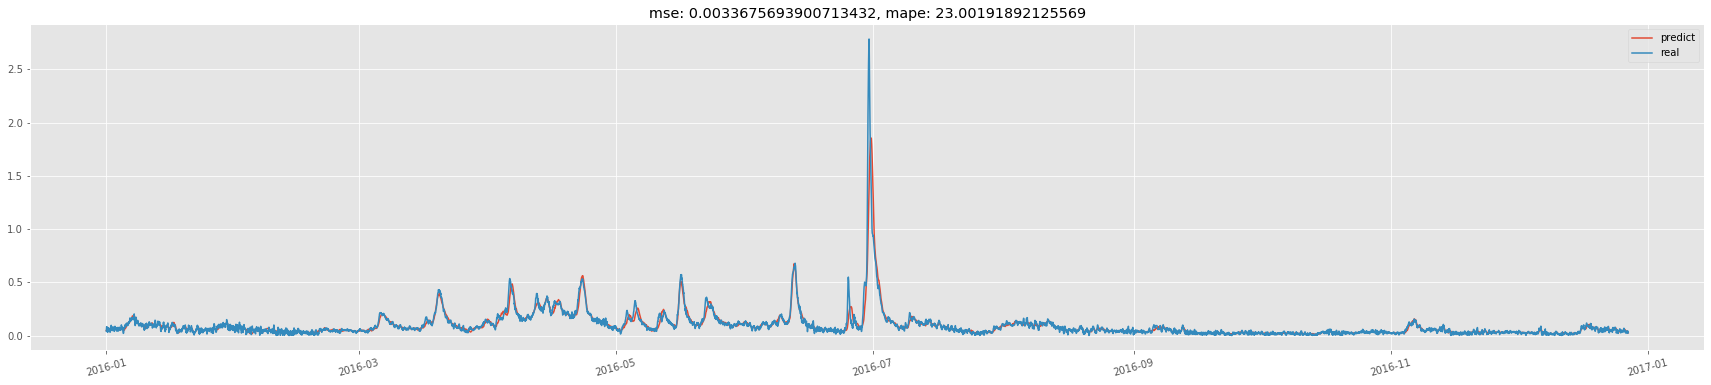

In [100]:
start = 1000
end = 2000
year = test_file_name.split('_')[0].split('/')[-1]
print(year)
date = pd.date_range(start=f'{year}/01/01 0:00:00',end=f'{year}/12/31 23:00:00',freq='h')
model = BayesianRidge()
model.fit(train_arr[:,1:],train_arr[:,0])
yhat = model.predict(test_arr[:,1:])

def plot_result(start,end):
    print(end)
    y = test_arr[start:end,0]
    x = date[start:end]
    plt.figure(figsize = (30,6))
    plt.plot(x,yhat[start:end,])
    plt.plot(x,y)
    plt.legend(('predict','real'))
    mse = util.mse(yhat[start:end],y)
    mape = util.mape(yhat[start:end],y)
    plt.title(f'mse: {mse}, mape: {mape}')
    plt.xticks(rotation=15)
    plt.show()
# lag = 1000   
# for start in range(0,8001,1000):
#     if(start == 8000):
#         print(len(test_arr))
#         plot_result(start,len(test_arr))
#     else:
#         plot_result(start,start+1000)
# #         pass
plot_result(0,len(yhat))

In [25]:
train_arr[:,1:].shape,train_arr[:,].shape

((8654, 123), (8654,))